# DeepSleep 
## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T
240seg a 100ms

In [1]:
board="nodemcu"
r = 10
ds = 30
TX = 4

batteries = [0.8, 2, 4, 10] #Ah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"
print(filename)

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

../data/dslp--nodemcu_r10_ds30-T4.csv


,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 17:28:33.040134,109429,2025-02-28 17:28:32,5.096,0.01,0.05096,0.001
1,1,2025-02-28 17:28:33.138111,109527,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
2,2,2025-02-28 17:28:33.240172,109629,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
3,3,2025-02-28 17:28:33.340064,109728,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
4,4,2025-02-28 17:28:33.437867,109827,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
...,...,...,...,...,...,...,...,...
2395,2395,2025-02-28 17:32:32.547791,348927,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001
2396,2396,2025-02-28 17:32:32.648577,349028,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001
2397,2397,2025-02-28 17:32:32.748619,349128,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001
2398,2398,2025-02-28 17:32:32.846973,349227,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001


In [3]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 17:28:33.040134,109429,2025-02-28 17:28:32,5.096,0.01,0.05096,0.001
1,1,2025-02-28 17:28:33.138111,109527,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
2,2,2025-02-28 17:28:33.240172,109629,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
3,3,2025-02-28 17:28:33.340064,109728,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
4,4,2025-02-28 17:28:33.437867,109827,2025-02-28 17:28:33,5.096,0.01,0.05096,0.001
...,...,...,...,...,...,...,...,...
2395,2395,2025-02-28 17:32:32.547791,348927,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001
2396,2396,2025-02-28 17:32:32.648577,349028,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001
2397,2397,2025-02-28 17:32:32.748619,349128,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001
2398,2398,2025-02-28 17:32:32.846973,349227,2025-02-28 17:32:32,5.096,0.01,0.05096,0.001


Text(0.5, 1.0, 'Current')

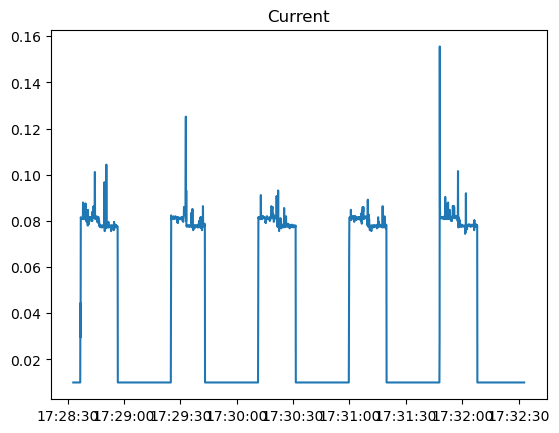

In [4]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

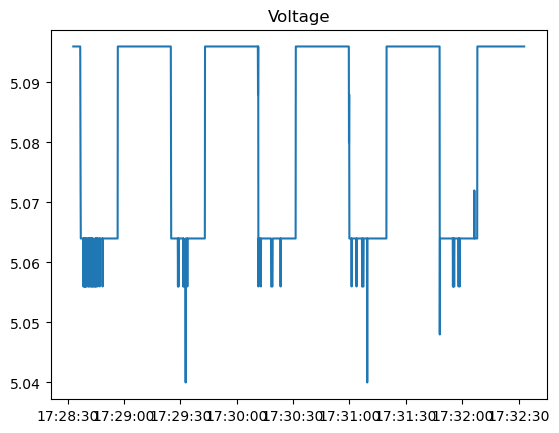

In [5]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [6]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(9.2456466706)

In [7]:
time_span = max(time_data)
time_span #seg

239.909827

In [8]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.03853800732639434)

## Expected runtime using batteries

In [9]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	20.8 hours,	0.86 days
At 2.00Ah:	51.9 hours,	2.16 days
At 4.00Ah:	103.8 hours,	4.32 days
At 10.00Ah:	259.5 hours,	10.81 days
